# Quantium Data Analytics Virtual Experience

## Task 2: Experimentation and uplift testing

### Background

Quantium has had a data partnership with a large supermarket brand for the last few years who provide transactional and customer data. You are an analyst within the Quantium analytics team and are responsible for delivering highly valued data analytics and insights to help the business make strategic decisions.

Supermarkets will regularly change their store layouts, product selections, prices and promotions. This is to satisfy their customer’s changing needs and preferences, keep up with the increasing competition in the market or to capitalise on new opportunities. The Quantium analytics team are engaged in these processes to evaluate and analyse the performance of change and recommend whether it has been successful.

In this program you will learn key analytics skills such as:

- Data wrangling
- Data visualization
- Programming skills
- Statistics
- Critical thinking
- Commercial thinking

### Task Description

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, has asked us to test the impact of the new trial layouts with a data driven recommendation to whether or not the trial layout should be rolled out to all their stores.

### Load Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/QVI_data.csv')

In [3]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


### Select Control Stores

The client has selected store numbers 77, 86 and 88 as trial stores and want
control stores to be established stores that are operational for the entire
observation period.
We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :

- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

Let's first create the metrics of interest and filter to stores that are present
throughout the pre-trial period.

In [4]:
# calculate a month ID

data['YEAR_MONTH'] = [''.join(x.split('-')[0:2]) for x in data.DATE]
data['YEAR_MONTH'] = pd.to_numeric(data['YEAR_MONTH'])

In [5]:
# statistical summary

data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,YEAR_MONTH
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512,201856.055163
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148,47.035278
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000,201807.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000,201809.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000,201812.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000,201903.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000,201906.000000


Next, we define the measure calculations to use during the analysis. <br>
For each store and month calculate:

- total sales
- number of customers
- transactions per customer
- chips per transaction
- the average price per unit.

In [6]:
# total sales

total_sales = data.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOT_SALES'].sum().reset_index()

total_sales.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES
0,1,201807,206.9
1,1,201808,176.1
2,1,201809,278.8
3,1,201810,188.1
4,1,201811,192.6


In [7]:
# number of customers

n_customers = data.groupby(['STORE_NBR', 'YEAR_MONTH'])['LYLTY_CARD_NBR'].nunique().reset_index()
n_customers.columns = ['STORE_NBR', 'YEAR_MONTH', 'N_CUST']

n_customers.head()

,STORE_NBR,YEAR_MONTH,N_CUST
0,1,201807,49
1,1,201808,42
2,1,201809,59
3,1,201810,44
4,1,201811,46


In [8]:
# transactions per customer

trans_per_cust = data.groupby(['STORE_NBR', 'YEAR_MONTH'])['TXN_ID'].nunique().reset_index()
trans_per_cust['TRANS_PER_CUST'] = trans_per_cust['TXN_ID'] / n_customers['N_CUST']

trans_per_cust.head()

,STORE_NBR,YEAR_MONTH,TXN_ID,TRANS_PER_CUST
0,1,201807,52,1.061224
1,1,201808,43,1.023810
2,1,201809,62,1.050847
3,1,201810,45,1.022727
4,1,201811,47,1.021739


In [9]:
# chips per transaction

chips_per_trans = data.groupby(['STORE_NBR', 'YEAR_MONTH'])['PROD_QTY'].sum().reset_index()
chips_per_trans['CHIPS_PER_TRANS'] = chips_per_trans['PROD_QTY'] / trans_per_cust['TXN_ID']

chips_per_trans.head()

,STORE_NBR,YEAR_MONTH,PROD_QTY,CHIPS_PER_TRANS
0,1,201807,62,1.192308
1,1,201808,54,1.255814
2,1,201809,75,1.209677
3,1,201810,58,1.288889
4,1,201811,57,1.212766


In [10]:
# average price per unit

avg_price = pd.DataFrame(total_sales['TOT_SALES'] / chips_per_trans['PROD_QTY'])

avg_price.columns = ['AVG_PRICE']

In [11]:
# merge our aggregated values into a dataframe

measure_OverTime = pd.concat([total_sales, 
                             n_customers['N_CUST'], 
                             trans_per_cust['TRANS_PER_CUST'], 
                             chips_per_trans['CHIPS_PER_TRANS'],
                             avg_price['AVG_PRICE']], axis = 1)

measure_OverTime.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,N_CUST,TRANS_PER_CUST,CHIPS_PER_TRANS,AVG_PRICE
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [12]:
measure_OverTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        3169 non-null   int64  
 1   YEAR_MONTH       3169 non-null   int64  
 2   TOT_SALES        3169 non-null   float64
 3   N_CUST           3169 non-null   int64  
 4   TRANS_PER_CUST   3169 non-null   float64
 5   CHIPS_PER_TRANS  3169 non-null   float64
 6   AVG_PRICE        3169 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 173.4 KB


In [13]:
# filter to the pre-trial period and stores with full observation periods

a = pd.pivot_table(data, index = 'STORE_NBR', 
                   columns = 'YEAR_MONTH', 
                   values = 'TXN_ID', 
                   aggfunc = 'count')

a

YEAR_MONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [14]:
# which stores does not have a full observation of 12 months?

null_store = a[a.isnull().any(axis = 1)].index.tolist()

null_store

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [15]:
# remove stores wihtout full observations

stores_full = measure_OverTime[~measure_OverTime['STORE_NBR'].isin(null_store)]

In [16]:
print(len(stores_full))

3120


In [17]:
# store pre-trial data (before Feb-2019) in a separate dataframe

preTrial_measures = stores_full.loc[stores_full['YEAR_MONTH'] < 201902, :]

In [18]:
print(len(preTrial_measures))

1820


Now we need to work out a way of ranking how similar each potential control store is to the trial store. We can calculate how correlated the performance of each store is to the trial store.

In [19]:
# create a function to calculate correlation for a measure, looping through each control store

def calculateCorrelation(df, metric, trial_store):
    
    """
    df: DataFrame, a metric table with potential comparison stores
    metric: str, store metric used to calculate correlation on
    trail_store: int, store number of the trial store
    
    output: a dataframe with the correlation scores
    
    """
    
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Correlation': []})
    
    a = df.loc[df['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = df['STORE_NBR'].unique()
    
    for i in storeNumbers:
        
        b = df.loc[df['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        output = output.append({'Store1': trial_store, 
                                'Store2': i, 
                                'Correlation': b.corr(a)}, 
                                 ignore_index = True)
        
    return output

Apart from correlation, we can also calculate a standardised metric based on the absolute difference between the trial store’s performance and each control store’s performance.

In [20]:
# create a function to calculate a standardised magnitude distance for a measure,
# looping through each control store

def calculateMagnitudeDistance(df, metric, trial_store):
    
    """
    df: DataFrame, a metric table with potential comparison stores
    metric: str, store metric used to calculate correlation on
    trail_store: int, store number of the trial store
    
    output: a dataframe with magnitude distance values
    
    """
    
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Magnitude' : []})
    
    a = df.loc[df['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = df['STORE_NBR'].unique()
    
    for i in storeNumbers:
        
        b = df.loc[df['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        c = abs(a - b)
        d = np.mean(1 - (c - min(c)) / (max(c) - min(c)))
        output = output.append({'Store1': trial_store, 
                                'Store2': i, 
                                'Magnitude': d}, 
                                 ignore_index = True)
        
    return output

Now let's use the functions to find the control stores! We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores. So we will need to use our functions to get four scores, two for each of total sales and total customers.

#### Find control store for store number 77

In [21]:
# calculate correlations against store 77 using total sales and number of customers

# sales correlation
corr_nSales = calculateCorrelation(preTrial_measures, 'TOT_SALES', 77)

# no. of customers correlation
corr_nCustomers = calculateCorrelation(preTrial_measures, 'N_CUST', 77)

In [22]:
# calculate magnitude distance against store 77 using total sales and number of customers

# sales magnitude distance
magnitude_nSales = calculateMagnitudeDistance(preTrial_measures, 'TOT_SALES', 77)

# no. of customers magnitude distance
magnitude_nCustomers = calculateMagnitudeDistance(preTrial_measures, 'N_CUST', 77)

In [23]:
corr_nSales.head()

,Store1,Store2,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652


In [24]:
magnitude_nSales.head()

,Store1,Store2,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320


We'll need to combine all the scores calculated using our function to create a composite score to rank on.


Let's take a simple average of the correlation and magnitude scores for each driver. Note that if we consider it more important for the trend of the drivers to be similar, we can increase the weight of the correlation score (a simple average gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of the drivers to be more important, we can lower the weight of the correlation score.

In [25]:
# Create a combined score composed of correlation and magnitude

def combined_score(correlation, magnitude, corr_weight):
    
    """
    correlation: DataFrame, the dataframe consisting of the correlation values
    magnitude: DataFrame, the dataframe consisting of the magnitude distance
    corr_weight: float, weight of correlation score
    
    output: a dataframe with a combined score between correlation and magnitude
    
    """
    
    magnitude.drop(columns = 'Store1', inplace = True)
    output = pd.merge(correlation, magnitude, how = 'left', on = 'Store2')

    output['score'] = corr_weight * output['Correlation'] + (1 - corr_weight) * output['Magnitude']
    
    return output

In [26]:
# combined scores for sales

score_nSales = combined_score(corr_nSales, magnitude_nSales, 0.5)

score_nSales.head() 

,Store1,Store2,Correlation,Magnitude,score
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [27]:
# combined scores for no. of customers

score_nCustomers = combined_score(corr_nCustomers, magnitude_nCustomers, 0.5)

score_nCustomers.tail()

,Store1,Store2,Correlation,Magnitude,score
255,77.0,268.0,0.369517,0.571429,0.470473
256,77.0,269.0,-0.474293,0.484472,0.005090
257,77.0,270.0,-0.131259,0.536680,0.202710
258,77.0,271.0,0.019629,0.328571,0.174100
259,77.0,272.0,0.223217,0.545455,0.384336


Now we have a score for each of total number of sales and number of customers. <br>
Let's combine the two via a simple average.

In [28]:
# combine scores across the drivers

def final_score(metric_1, metric_2):
    
    """
    metric_1: DataFrame, the dataframe with the combined scores for the first metric
    metric_2: DataFrame, the dataframe with the combined scores for the second metric
    
    output: a dataframe with the final score to determine the control store
    
    """
    
    output = pd.concat([metric_1['Store2'], 
                        metric_1['score'], 
                        metric_2['score']], axis = 1)
    output.columns = ['Store2', 'corr_score', 'mag_score']
    output['final_score'] = 0.5 * output['corr_score'] + 0.5 * output['mag_score']
    
    output.sort_values(by = 'final_score', ascending = False, inplace = True)
    
    return output

In [29]:
# final score for control store to match with trial store 77

score_Control = final_score(score_nSales, score_nCustomers)

score_Control.head()

,Store2,corr_score,mag_score,final_score
221,233.0,0.697290,0.816607,0.756949
67,71.0,0.789497,0.663123,0.726310
79,84.0,0.656972,0.715000,0.685986
111,119.0,0.636046,0.729729,0.682887
108,115.0,0.708347,0.645155,0.676751


The store with the highest score is then selected as the control store since it is most similar to the trial store.

In [30]:
# control store for trial store 77

control_store = score_Control['Store2'].iloc[0]

control_store

233.0

Now that we have found a control store, let's check visually if the drivers are indeed similar in the period before the trial.

In [31]:
# let's create a function to categorise the stores
# by trial, control or others

def past_period(df, trial_store, control_store):
    
    """
    df: DataFrame, the input dataframe
    trial_store: int, the trial store number
    control_store: int, the control store number
    
    output: the original dataframe with 2 additonal columns (store_stype and transaction_month)
    
    """
    
    past = df.copy()
    
    store_type = []
    
    for i in past['STORE_NBR']:
    
        if i == trial_store:
            store_type.append('Trial Store')

        elif i == control_store:
            store_type.append('Control Store')

        else:
            store_type.append('Other Stores')

    past['store_type'] = store_type

    past = past.loc[past['YEAR_MONTH'] < 201903, :]
    
    past['Transaction_Month'] = pd.to_datetime(
        past['YEAR_MONTH'].astype(str), format = '%Y%m')
    
    return past

In [32]:
# categorise store type

past_period_77 = past_period(measure_OverTime, 77, 233)

past_period_77.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,N_CUST,TRANS_PER_CUST,CHIPS_PER_TRANS,AVG_PRICE,store_type,Transaction_Month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [33]:
past_period_77['store_type'].value_counts()

Other Stores     2096
Trial Store         8
Control Store       8
Name: store_type, dtype: int64

In [34]:
# let's look at total sales first

pastSales_plot = pd.pivot_table(past_period_77, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'TOT_SALES', 
                   aggfunc = np.mean)

pastSales_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,290.7,623.817424,296.8
2018-08-01,285.9,603.600192,255.5
2018-09-01,228.6,610.947328,225.2
2018-10-01,185.7,623.671103,204.5
2018-11-01,211.6,609.835115,245.3
2018-12-01,279.8,641.250192,267.3
2019-01-01,177.5,621.687356,204.4
2019-02-01,244.0,573.229008,235.0


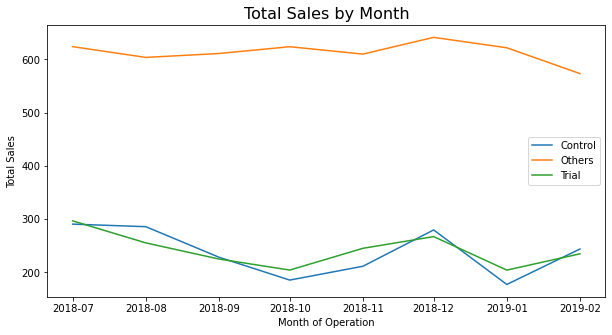

In [35]:
# plot total sales by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastSales_plot)

plt.title('Total Sales by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

Great, sales are trending in a similar way.

In [36]:
# let's look at number of customers next

pastCust_plot = pd.pivot_table(past_period_77, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'N_CUST', 
                   aggfunc = np.mean)

pastCust_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,51.0,70.750000,51.0
2018-08-01,48.0,71.352490,47.0
2018-09-01,42.0,69.110687,42.0
2018-10-01,35.0,70.334601,37.0
2018-11-01,40.0,69.534351,41.0
2018-12-01,47.0,72.731801,46.0
2019-01-01,35.0,70.471264,35.0
2019-02-01,45.0,65.492366,45.0


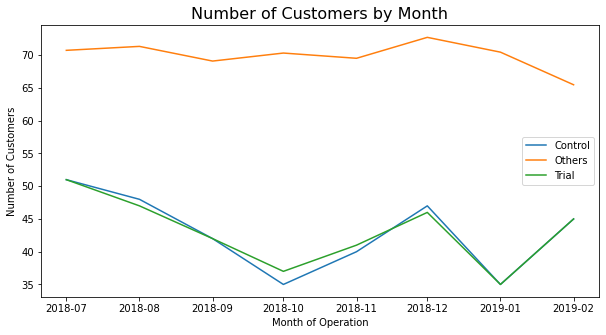

In [37]:
# plot number of customers by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastCust_plot)

plt.title('Number of Customers by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

Total number of customers of the control and trial stores are also similar.

#### Assessment of Trial

The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

We'll start with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period.

In [38]:
# create a function to generate a scaling factor for control store for a given metric

def scaling_factor(df, trial_store, control_store, agg):
    
    """
    df: DataFrame, the input dataframe
    trial_store: int, the trial store number
    control_store: int, the control store number
    agg: str, the metric to scale
    
    output: scaling factor (type: float)
    
    """
    
    trial_sum = df.loc[df['STORE_NBR'] == trial_store, agg].sum()
    control_sum = df.loc[df['STORE_NBR'] == control_store, agg].sum()
    
    result = trial_sum / control_sum
    
    return result

In [39]:
# scaling factor for sales

scalingFactor_Sales = scaling_factor(preTrial_measures, 77, 233, 'TOT_SALES')

scalingFactor_Sales

1.023617303289553

Now that we have the scaling factor for sales, we can scale pre‐trial control sales to match pre‐trial trial store sales. <br>
We can also calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

In [40]:
# create a function to calculate the percentage difference between 
# the scaled control metric and the trial store's metric during the trial period

def percent_diff(df, trial_store, control_store, agg):
    
    """
    df: DataFrame, the input dataframe
    trial_store: int, the trial store number
    control_store: int, the control store number
    agg: str, the metric used to scale
    
    output: a dataframe consisting of the scaled metric values and its percentage difference
    
    """
    
    scaled_control = df.loc[df['STORE_NBR'] == control_store]
    scaled_control['scaled_agg'] = scaled_control[agg] * scalingFactor_Sales
    
    percentage_diff = scaled_control[['YEAR_MONTH', 'scaled_agg']]
    percentage_diff.reset_index(drop = True, inplace = True)
    
    trial_agg = df.loc[df['STORE_NBR'] == trial_store, agg]
    trial_agg.reset_index(drop = True, inplace = True)
    
    percentage_diff = pd.concat([percentage_diff, trial_agg], axis = 1)
    percentage_diff.rename(columns = {})
    
    percentage_diff['percent_diff'] = abs(
        percentage_diff['scaled_agg'] - percentage_diff[agg]) / percentage_diff['scaled_agg']
    
    return percentage_diff
    

In [41]:
# scale pre-trial control sales to match pre-trial trial store sales
# and get the percentage difference

sales_diff = percent_diff(measure_OverTime, 77, 233, 'TOT_SALES')

sales_diff

,YEAR_MONTH,scaled_agg,TOT_SALES,percent_diff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period.

In [42]:
from statistics import stdev

sigma = stdev(sales_diff.loc[sales_diff['YEAR_MONTH'] < 201902, 'percent_diff'])

sigma

0.049940762641425544

In [43]:
# note that there are 8 months in the pre-trial period hence 8 - 1 = 7 degrees of freedom

dof = 7

We will test with a null hypothesis of there being 0 difference between trial and control stores.

Calculate the t-values for the trial months. After that, find the 95th percentile of the t distribution with the appropriate degrees of freedom to check whether the hypothesis is statistically significant.

In [44]:
# calculate the t-value for the trial period

sales_diff['tValue'] = (sales_diff['percent_diff'] - 0) / sigma

print('t-value for trial period Feb to Apr 2019')

sales_diff.loc[
    (sales_diff['YEAR_MONTH'] > 201901) & (sales_diff['YEAR_MONTH'] < 201905),
    'tValue']

t-value for trial period Feb to Apr 2019


7     1.183534
8     7.339116
9    12.476373
Name: tValue, dtype: float64

In [45]:
from scipy.stats import t

# find the 95th percentile of the t distribution with dof = 7

t.isf(0.05, dof)

1.8945786050613054

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

In [46]:
# create a function to calculate the 95th and 5th percentile values 

def trial_assessment(df, trial_store, control_store, agg):
    
    
    """
    df: DataFrame, the input dataframe
    trial_store: int, the trial store number
    control_store: int, the control store number
    agg: str, the metric to calculate
    
    output: a dataframe consisting of 
    - the scaled metric values 
    - the trial metric values
    - 95th percentile values 
    - 5th percentile values
    
    """
    
    scaled_control = df.loc[df['STORE_NBR'] == control_store]
    scaled_control['scaled_agg'] = scaled_control[agg] * scalingFactor_Sales
    scaled_control['Transaction_Month'] = pd.to_datetime(
        scaled_control['YEAR_MONTH'].astype(str), 
        format = '%Y%m')
    
    control = scaled_control.loc[:, ['Transaction_Month', 'scaled_agg']]
    control.set_index('Transaction_Month', inplace = True)
    
    df['Transaction_Month'] = pd.to_datetime(
        df['YEAR_MONTH'].astype(str), 
        format = '%Y%m')
    
    trial = df.loc[
        df['STORE_NBR'] == trial_store, ['Transaction_Month', agg]]
    trial.set_index('Transaction_Month', inplace = True)
    
    control['Control 5th percentile'] = control['scaled_agg'] * (1 - sigma * 2)
    control['Control 95th percentile'] = control['scaled_agg'] * (1 + sigma * 2)
    
    combined = pd.merge(control, trial, left_index = True, right_index = True)
    
    return combined

In [47]:
# complete trial assessment for sales

sales_assessment = trial_assessment(measure_OverTime, 77, 233, 'TOT_SALES')

sales_assessment

,scaled_agg,Control 5th percentile,Control 95th percentile,TOT_SALES
Transaction_Month,,,,
2018-07-01,297.565550,267.844249,327.286851,296.8
2018-08-01,292.652187,263.421640,321.882734,255.5
2018-09-01,233.998916,210.626747,257.371084,225.2
2018-10-01,190.085733,171.099680,209.071786,204.5
2018-11-01,216.597421,194.963341,238.231502,245.3
2018-12-01,286.408121,257.801241,315.015001,267.3
2019-01-01,181.692071,163.544390,199.839753,204.4
2019-02-01,249.762622,224.815950,274.709294,235.0
2019-03-01,203.802205,183.446130,224.158280,278.5


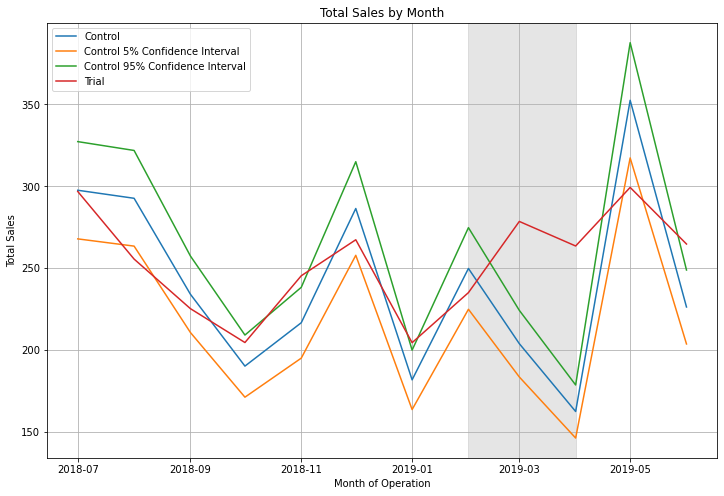

In [48]:
# plot the trial values against the control values and its 95th and 5th percentile

import matplotlib.dates as mdates

plt.figure(figsize = (12, 8))
plt.plot(sales_assessment)

plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial'])

# highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.grid()
plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let's have a look at assessing this for number of customers as well.

In [49]:
# scaling factor for no. of customers

scalingFactor_Cust = scaling_factor(preTrial_measures, 77, 233, 'N_CUST')

scalingFactor_Cust

1.0033557046979866

In [50]:
# scale pre-trial control customers to match pre-trial trial store customers
# and get the percentage difference

cust_diff = percent_diff(measure_OverTime, 77, 233, 'N_CUST')

cust_diff

,YEAR_MONTH,scaled_agg,N_CUST,percent_diff
0,201807,52.204482,51,0.023072
1,201808,49.133631,47,0.043425
2,201809,42.991927,42,0.023072
3,201810,35.826606,37,0.032752
4,201811,40.944692,41,0.001351
5,201812,48.110013,46,0.043858
6,201901,35.826606,35,0.023072
7,201902,46.062779,45,0.023072
8,201903,40.944692,50,0.221160
9,201904,30.708519,47,0.530520


As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period.

In [51]:
sigma = stdev(cust_diff.loc[cust_diff['YEAR_MONTH'] < 201902, 'percent_diff'])

sigma

0.014667744261174757

In [52]:
# complete trial assessment for customers

cust_assessment = trial_assessment(measure_OverTime, 77, 233, 'N_CUST')

cust_assessment

,scaled_agg,Control 5th percentile,Control 95th percentile,N_CUST
Transaction_Month,,,,
2018-07-01,52.204482,50.673038,53.735926,51
2018-08-01,49.133631,47.692272,50.574990,47
2018-09-01,42.991927,41.730738,44.253116,42
2018-10-01,35.826606,34.775615,36.877597,37
2018-11-01,40.944692,39.743560,42.145825,41
2018-12-01,48.110013,46.698683,49.521344,46
2019-01-01,35.826606,34.775615,36.877597,35
2019-02-01,46.062779,44.711505,47.414053,45
2019-03-01,40.944692,39.743560,42.145825,50


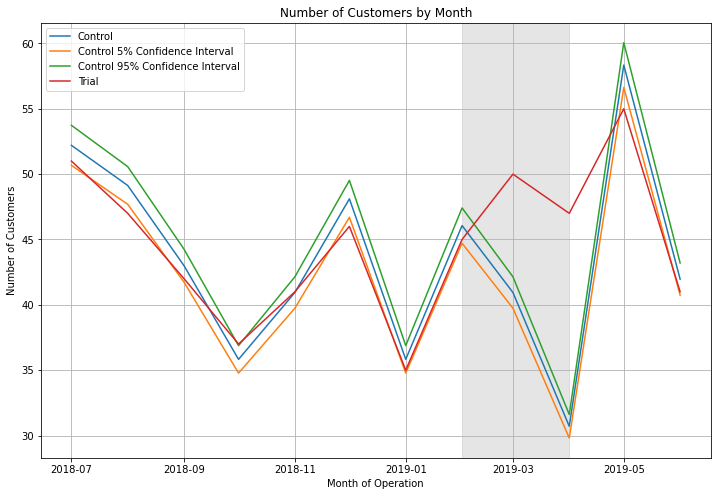

In [53]:
# plot the trial values against the control values and its 95th and 5th percentile

plt.figure(figsize = (12, 8))
plt.plot(cust_assessment)

plt.title('Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

plt.legend(['Control', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial'])

# highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.grid()
plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let’s repeat finding the control store and assessing the impact of the trial for each of the other two trial stores.

#### Find control store for store number 86

In [54]:
# calculate correlations against store 86 using total sales and number of customers

# sales correlation
corr_nSales = calculateCorrelation(preTrial_measures, 'TOT_SALES', 86)

# no. of cutomers correlation
corr_nCustomers = calculateCorrelation(preTrial_measures, 'N_CUST', 86)

In [55]:
# calculate magnitude distance against store 86 using total sales and number of customers

# sales magnitude distance
magnitude_nSales = calculateMagnitudeDistance(preTrial_measures, 'TOT_SALES', 86)

# no. of cutomers magnitude distance
magnitude_nCustomers = calculateMagnitudeDistance(preTrial_measures, 'N_CUST', 86)

In [56]:
corr_nSales.head()

,Store1,Store2,Correlation
0,86.0,1.0,0.445632
1,86.0,2.0,-0.403835
2,86.0,3.0,-0.261284
3,86.0,4.0,-0.039035
4,86.0,5.0,0.235159


In [57]:
magnitude_nSales.head()

,Store1,Store2,Magnitude
0,86.0,1.0,0.488334
1,86.0,2.0,0.321131
2,86.0,3.0,0.507515
3,86.0,4.0,0.635654
4,86.0,5.0,0.579835


In [58]:
# combined scores for sales

score_nSales = combined_score(corr_nSales, magnitude_nSales, 0.5)

score_nSales.head() 

,Store1,Store2,Correlation,Magnitude,score
0,86.0,1.0,0.445632,0.488334,0.466983
1,86.0,2.0,-0.403835,0.321131,-0.041352
2,86.0,3.0,-0.261284,0.507515,0.123116
3,86.0,4.0,-0.039035,0.635654,0.298309
4,86.0,5.0,0.235159,0.579835,0.407497


In [59]:
# combined scores for no. of customers

score_nCustomers = combined_score(corr_nCustomers, magnitude_nCustomers, 0.5)

score_nCustomers.tail()

,Store1,Store2,Correlation,Magnitude,score
255,86.0,268.0,-0.034273,0.566327,0.266027
256,86.0,269.0,-0.098587,0.581633,0.241523
257,86.0,270.0,-0.767267,0.650794,-0.058237
258,86.0,271.0,0.267393,0.598214,0.432804
259,86.0,272.0,-0.353815,0.633540,0.139863


In [60]:
# final score for control store to match with trial store 86

score_Control = final_score(score_nSales, score_nCustomers)

score_Control.head()

,Store2,corr_score,mag_score,final_score
147,155.0,0.808106,0.733343,0.770724
102,109.0,0.697120,0.742532,0.719826
107,114.0,0.631393,0.663384,0.647389
213,225.0,0.601841,0.684356,0.643099
130,138.0,0.593296,0.660565,0.626930


In [61]:
# control store for trial store 86

control_store = score_Control['Store2'].iloc[0]

control_store

155.0

Now that we have found a control store, let's check visually if the drivers are indeed similar in the period before the trial.

In [62]:
# categorise store type

past_period_86 = past_period(measure_OverTime, 86, 155)

past_period_86.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,N_CUST,TRANS_PER_CUST,CHIPS_PER_TRANS,AVG_PRICE,Transaction_Month,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01,Other Stores


In [63]:
# let's look at total sales first

pastSales_plot = pd.pivot_table(past_period_86, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'TOT_SALES', 
                   aggfunc = np.mean)

pastSales_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,924.6,619.160985,892.20
2018-08-01,782.7,599.748276,764.05
2018-09-01,1014.4,605.316794,914.60
2018-10-01,963.8,617.884030,948.40
2018-11-01,898.8,604.644656,918.00
2018-12-01,849.8,636.867433,841.20
2019-01-01,874.6,616.575862,841.40
2019-02-01,891.2,568.170229,913.20


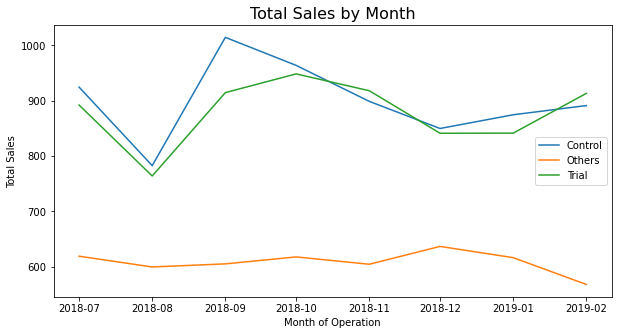

In [64]:
# plot total sales by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastSales_plot)

plt.title('Total Sales by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

Great, sales are trending in a similar way.

In [65]:
# let's look at number of customers next

pastCust_plot = pd.pivot_table(past_period_86, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'N_CUST', 
                   aggfunc = np.mean)

pastCust_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,101.0,70.378788,99.0
2018-08-01,91.0,71.007663,94.0
2018-09-01,103.0,68.645038,103.0
2018-10-01,108.0,69.783270,109.0
2018-11-01,101.0,69.076336,100.0
2018-12-01,97.0,72.340996,98.0
2019-01-01,96.0,70.011494,94.0
2019-02-01,95.0,65.064885,107.0


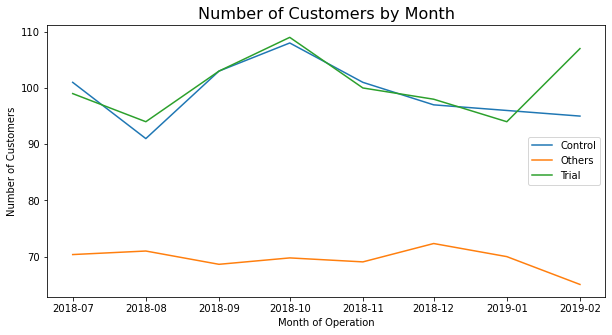

In [66]:
# plot number of customers by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastCust_plot)

plt.title('Number of Customers by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

Good, the trend in number of customers is also similar. <br>
Let’s now assess the impact of the trial on sales.

In [67]:
# scaling factor for sales

scalingFactor_Sales = scaling_factor(preTrial_measures, 86, 155, 'TOT_SALES')

scalingFactor_Sales

0.9700651481287746

In [68]:
# scale pre-trial control sales to match pre-trial trial store sales
# and get the percentage difference

sales_diff = percent_diff(measure_OverTime, 86, 155, 'TOT_SALES')

sales_diff

,YEAR_MONTH,scaled_agg,TOT_SALES,percent_diff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880
5,201812,824.361363,841.20,0.020426
6,201901,848.418979,841.40,0.008273
7,201902,864.522060,913.20,0.056306
8,201903,780.320405,1026.80,0.315870
9,201904,819.317024,848.20,0.035253


In [69]:
# get standard deviation

sigma = stdev(sales_diff.loc[sales_diff['YEAR_MONTH'] < 201902, 'percent_diff'])

sigma

0.025833952854772586

In [70]:
# complete trial assessment for sales

sales_assessment = trial_assessment(measure_OverTime, 86, 155, 'TOT_SALES')

sales_assessment

,scaled_agg,Control 5th percentile,Control 95th percentile,TOT_SALES
Transaction_Month,,,,
2018-07-01,896.922236,850.580142,943.264329,892.20
2018-08-01,759.269991,720.040101,798.499882,764.05
2018-09-01,984.034086,933.191106,1034.877067,914.60
2018-10-01,934.948790,886.641944,983.255636,948.40
2018-11-01,871.894555,826.845589,916.943521,918.00
2018-12-01,824.361363,781.768338,866.954388,841.20
2019-01-01,848.418979,804.582947,892.255010,841.40
2019-02-01,864.522060,819.854016,909.190104,913.20
2019-03-01,780.320405,740.002884,820.637926,1026.80


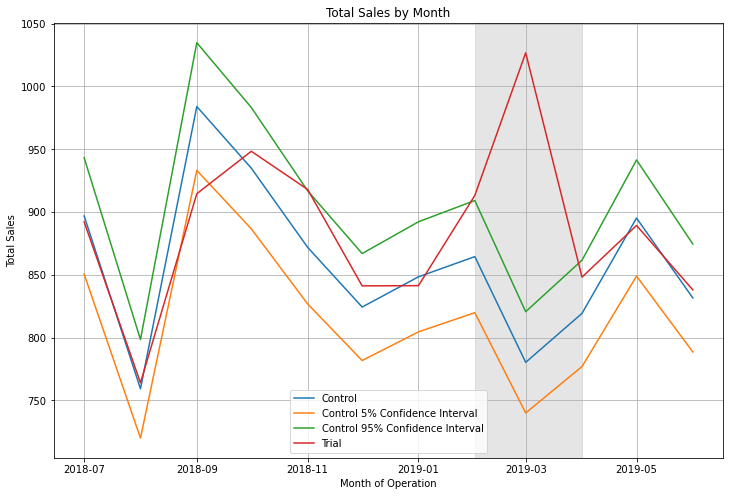

In [71]:
# plot the trial values against the control values and its 95th and 5th percentile

plt.figure(figsize = (12, 8))
plt.plot(sales_assessment)

plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial'])

# highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.grid()
plt.show()

The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let's have a look at assessing this for number of customers as well.

In [72]:
# scaling factor for customers

scalingFactor_Cust = scaling_factor(preTrial_measures, 86, 155, 'N_CUST')

scalingFactor_Cust

1.0

In [73]:
# scale pre-trial control customers to match pre-trial trial store customers
# and get the percentage difference

cust_diff = percent_diff(measure_OverTime, 86, 155, 'N_CUST')

cust_diff

,YEAR_MONTH,scaled_agg,N_CUST,percent_diff
0,201807,97.976580,99,0.010446
1,201808,88.275928,94,0.064843
2,201809,99.916710,103,0.030859
3,201810,104.767036,109,0.040404
4,201811,97.976580,100,0.020652
5,201812,94.096319,98,0.041486
6,201901,93.126254,94,0.009382
7,201902,92.156189,107,0.161072
8,201903,91.186124,115,0.261157
9,201904,96.036450,105,0.093335


As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period.

In [74]:
sigma = stdev(cust_diff.loc[cust_diff['YEAR_MONTH'] < 201902, 'percent_diff'])

sigma

0.01975040585590508

In [75]:
# complete trial assessment for customers

cust_assessment = trial_assessment(measure_OverTime, 86, 155, 'N_CUST')

cust_assessment

,scaled_agg,Control 5th percentile,Control 95th percentile,N_CUST
Transaction_Month,,,,
2018-07-01,97.976580,94.106426,101.846734,99
2018-08-01,88.275928,84.788958,91.762899,94
2018-09-01,99.916710,95.969919,103.863501,103
2018-10-01,104.767036,100.628653,108.905419,109
2018-11-01,97.976580,94.106426,101.846734,100
2018-12-01,94.096319,90.379438,97.813200,98
2019-01-01,93.126254,89.447692,96.804817,94
2019-02-01,92.156189,88.515945,95.796433,107
2019-03-01,91.186124,87.584198,94.788050,115


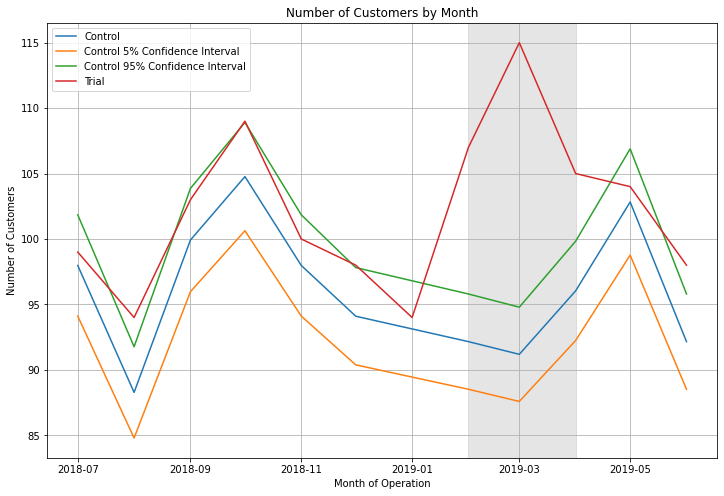

In [76]:
# plot the trial values against the control values and its 95th and 5th percentile

plt.figure(figsize = (12, 8))
plt.plot(cust_assessment)

plt.title('Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

plt.legend(['Control', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial'])

# highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.grid()
plt.show()

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. <br>
We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

#### Find control store for store number 88

In [77]:
# calculate correlations against store 88 using total sales and number of customers

# sales correlation
corr_nSales = calculateCorrelation(preTrial_measures, 'TOT_SALES', 88)

# no. of customers correlation
corr_nCustomers = calculateCorrelation(preTrial_measures, 'N_CUST', 88)

In [78]:
# calculate magnitude distance against store 88 using total sales and number of customers

# sales magnitude distance
magnitude_nSales = calculateMagnitudeDistance(preTrial_measures, 'TOT_SALES', 88)

# no. of customers magnitude distance
magnitude_nCustomers = calculateMagnitudeDistance(preTrial_measures, 'N_CUST', 88)

In [79]:
corr_nSales.head()

,Store1,Store2,Correlation
0,88.0,1.0,0.813636
1,88.0,2.0,-0.067927
2,88.0,3.0,-0.507847
3,88.0,4.0,-0.745566
4,88.0,5.0,0.190330


In [80]:
magnitude_nSales.head()

,Store1,Store2,Magnitude
0,88.0,1.0,0.548959
1,88.0,2.0,0.541212
2,88.0,3.0,0.458109
3,88.0,4.0,0.484447
4,88.0,5.0,0.496409


In [81]:
# combined scores for sales

score_nSales = combined_score(corr_nSales, magnitude_nSales, 0.5)

score_nSales.head() 

,Store1,Store2,Correlation,Magnitude,score
0,88.0,1.0,0.813636,0.548959,0.681297
1,88.0,2.0,-0.067927,0.541212,0.236643
2,88.0,3.0,-0.507847,0.458109,-0.024869
3,88.0,4.0,-0.745566,0.484447,-0.130559
4,88.0,5.0,0.190330,0.496409,0.343370


In [82]:
# combined scores for no. of customers

score_nCustomers = combined_score(corr_nCustomers, magnitude_nCustomers, 0.5)

score_nCustomers.tail()

,Store1,Store2,Correlation,Magnitude,score
255,88.0,268.0,0.672672,0.630252,0.651462
256,88.0,269.0,-0.274781,0.360902,0.043061
257,88.0,270.0,-0.103032,0.367965,0.132467
258,88.0,271.0,-0.018831,0.655844,0.318507
259,88.0,272.0,0.026909,0.448980,0.237944


In [83]:
# final score for control store to match with trial store 88

score_Control = final_score(score_nSales, score_nCustomers)

score_Control.head()

,Store2,corr_score,mag_score,final_score
170,178.0,0.650803,0.707828,0.679316
12,14.0,0.646064,0.685774,0.665919
126,134.0,0.775084,0.540154,0.657619
225,237.0,0.451974,0.777235,0.614604
179,187.0,0.616752,0.594560,0.605656


In [84]:
# control store for trial store 88

control_store = score_Control['Store2'].iloc[0]

control_store

178.0

Now that we have found a control store, let's check visually if the drivers are indeed similar in the period before the trial.

In [85]:
# categorise store type

past_period_88 = past_period(measure_OverTime, 88, 178)

past_period_88.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,N_CUST,TRANS_PER_CUST,CHIPS_PER_TRANS,AVG_PRICE,Transaction_Month,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01,Other Stores


In [86]:
# let's look at total sales first

pastSales_plot = pd.pivot_table(past_period_88, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'TOT_SALES', 
                   aggfunc = np.mean)

pastSales_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,952.0,617.474621,1310.0
2018-08-01,915.5,597.094828,1323.8
2018-09-01,954.4,603.605344,1423.0
2018-10-01,962.6,616.352471,1352.4
2018-11-01,975.6,602.577481,1382.8
2018-12-01,947.2,634.639847,1325.2
2019-01-01,837.2,615.090805,1266.4
2019-02-01,1088.8,565.671756,1370.2


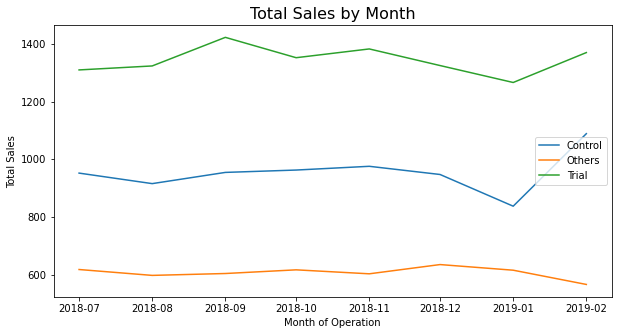

In [87]:
# plot total sales by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastSales_plot)

plt.title('Total Sales by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

It seems like store number 178 is not a good match for trial store number 88 in terms of sales. Let's look at the number of customers as well.

In [88]:
# let's look at number of customers next

pastCust_plot = pd.pivot_table(past_period_88, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'N_CUST', 
                   aggfunc = np.mean)

pastCust_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,107.0,70.242424,129.0
2018-08-01,108.0,70.800766,131.0
2018-09-01,101.0,68.572519,124.0
2018-10-01,102.0,69.752852,123.0
2018-11-01,111.0,68.923664,130.0
2018-12-01,101.0,72.218391,126.0
2019-01-01,95.0,69.927203,117.0
2019-02-01,107.0,64.954198,124.0


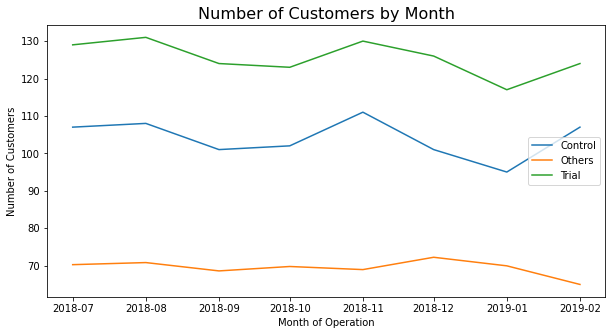

In [89]:
# plot number of customers by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastCust_plot)

plt.title('Number of Customers by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

The number of customers does not show a good match as well between store number 88 and 178. <br>
Let's try the next the store on the list (14).

In [90]:
# categorise store type

past_period_88 = past_period(measure_OverTime, 88, 14)

past_period_88.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,N_CUST,TRANS_PER_CUST,CHIPS_PER_TRANS,AVG_PRICE,Transaction_Month,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01,Other Stores


In [91]:
# let's look at total sales first

pastSales_plot = pd.pivot_table(past_period_88, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'TOT_SALES', 
                   aggfunc = np.mean)

pastSales_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,46.9,620.903030,1310.0
2018-08-01,46.8,600.423180,1323.8
2018-09-01,47.5,607.066794,1423.0
2018-10-01,42.0,619.852852,1352.4
2018-11-01,47.6,606.119466,1382.8
2018-12-01,34.4,638.137165,1325.2
2019-01-01,18.0,618.229502,1266.4
2019-02-01,34.4,569.696183,1370.2


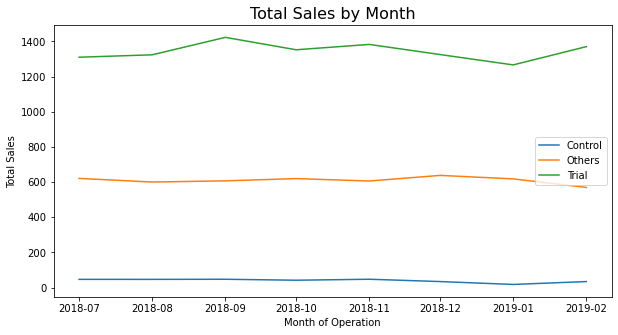

In [92]:
# plot total sales by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastSales_plot)

plt.title('Total Sales by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

It seems like store number 14 is not a good match for trial store number 88 in terms of sales. Let's look at the number of customers as well.

In [93]:
# let's look at number of customers next

pastCust_plot = pd.pivot_table(past_period_88, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'N_CUST', 
                   aggfunc = np.mean)

pastCust_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,8.0,70.617424,129.0
2018-08-01,8.0,71.183908,131.0
2018-09-01,7.0,68.931298,124.0
2018-10-01,6.0,70.117871,123.0
2018-11-01,8.0,69.316794,130.0
2018-12-01,6.0,72.582375,126.0
2019-01-01,3.0,70.279693,117.0
2019-02-01,5.0,65.343511,124.0


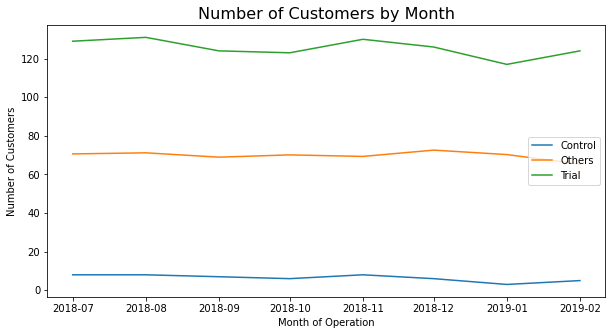

In [94]:
# plot number of customers by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastCust_plot)

plt.title('Number of Customers by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

The number of customers does not show a good match as well between store number 88 and 14. <br>
Let's try the next the store on the list (134).

In [95]:
# categorise store type

past_period_88 = past_period(measure_OverTime, 88, 134)

past_period_88.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,N_CUST,TRANS_PER_CUST,CHIPS_PER_TRANS,AVG_PRICE,Transaction_Month,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01,Other Stores


In [96]:
# let's look at total sales first

pastSales_plot = pd.pivot_table(past_period_88, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'TOT_SALES', 
                   aggfunc = np.mean)

pastSales_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,419.20,619.492803,1310.0
2018-08-01,432.65,598.944828,1323.8
2018-09-01,463.80,605.477863,1423.0
2018-10-01,473.40,618.212548,1352.4
2018-11-01,467.60,604.516412,1382.8
2018-12-01,413.40,636.685057,1325.2
2019-01-01,384.20,616.826437,1266.4
2019-02-01,347.60,568.500763,1370.2


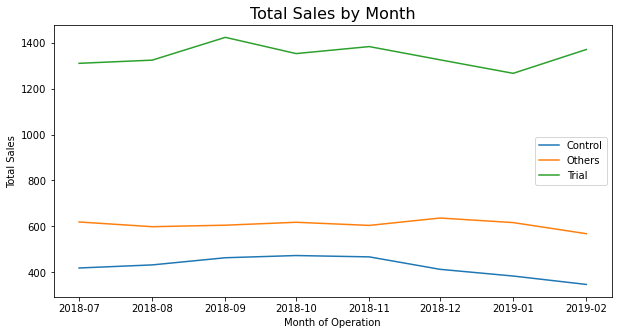

In [97]:
# plot total sales by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastSales_plot)

plt.title('Total Sales by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

It seems like store number 134 is not a good match for trial store number 88 in terms of sales. Let's look at the number of customers as well.

In [98]:
# let's look at number of customers next

pastCust_plot = pd.pivot_table(past_period_88, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'N_CUST', 
                   aggfunc = np.mean)

pastCust_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,47.0,70.469697,129.0
2018-08-01,48.0,71.030651,131.0
2018-09-01,50.0,68.767176,124.0
2018-10-01,48.0,69.958175,123.0
2018-11-01,54.0,69.141221,130.0
2018-12-01,42.0,72.444444,126.0
2019-01-01,43.0,70.126437,117.0
2019-02-01,36.0,65.225191,124.0


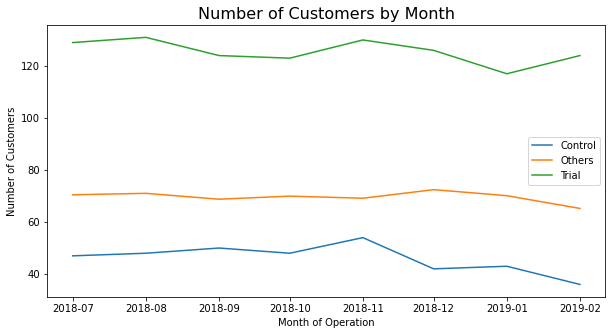

In [99]:
# plot number of customers by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastCust_plot)

plt.title('Number of Customers by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

The number of customers does not show a good match as well between store number 88 and 134. <br>
Let's try the next the store on the list (237).

In [100]:
# categorise store type

past_period_88 = past_period(measure_OverTime, 88, 237)

past_period_88.head()

,STORE_NBR,YEAR_MONTH,TOT_SALES,N_CUST,TRANS_PER_CUST,CHIPS_PER_TRANS,AVG_PRICE,Transaction_Month,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01,Other Stores


In [101]:
# let's look at total sales first

pastSales_plot = pd.pivot_table(past_period_88, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'TOT_SALES', 
                   aggfunc = np.mean)

pastSales_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,1448.4,615.594318,1310.0
2018-08-01,1367.8,595.361877,1323.8
2018-09-01,1322.2,602.201527,1423.0
2018-10-01,1348.3,614.885932,1352.4
2018-11-01,1397.6,600.966794,1382.8
2018-12-01,1265.0,633.422222,1325.2
2019-01-01,1219.7,613.625287,1266.4
2019-02-01,1404.8,564.465649,1370.2


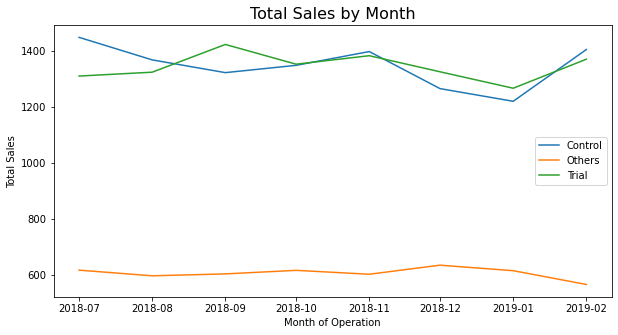

In [102]:
# plot total sales by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastSales_plot)

plt.title('Total Sales by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

Great, the trial and control stores have similar total sales.

In [103]:
# let's look at number of customers next

pastCust_plot = pd.pivot_table(past_period_88, index = 'Transaction_Month', 
                   columns = 'store_type', 
                   values = 'N_CUST', 
                   aggfunc = np.mean)

pastCust_plot

store_type,Control Store,Other Stores,Trial Store
Transaction_Month,,,
2018-07-01,128.0,70.162879,129.0
2018-08-01,135.0,70.697318,131.0
2018-09-01,126.0,68.477099,124.0
2018-10-01,123.0,69.673004,123.0
2018-11-01,132.0,68.843511,130.0
2018-12-01,124.0,72.130268,126.0
2019-01-01,117.0,69.842912,117.0
2019-02-01,126.0,64.881679,124.0


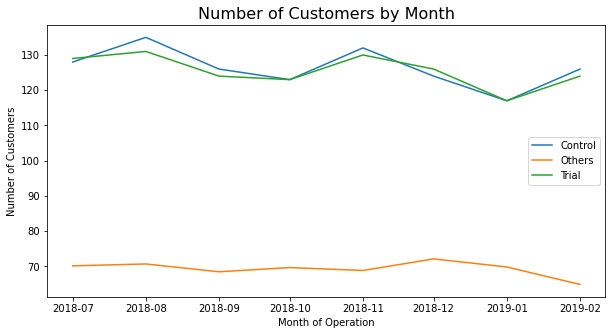

In [104]:
# plot number of customers by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(pastCust_plot)

plt.title('Number of Customers by Month', fontsize = 16)
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

plt.legend(['Control', 'Others', 'Trial'], loc = 5)

Total number of customers of the control and trial stores are also similar. We will set store number 237 as the control store for trial store 88. <br>
Let’s now assess the impact of the trial on sales.

In [105]:
# scaling factor for sales

scalingFactor_Sales = scaling_factor(preTrial_measures, 88, 237, 'TOT_SALES')

scalingFactor_Sales

1.0015583306649594

In [106]:
# scale pre-trial control sales to match pre-trial trial store sales
# and get the percentage difference

sales_diff = percent_diff(measure_OverTime, 88, 237, 'TOT_SALES')

sales_diff

,YEAR_MONTH,scaled_agg,TOT_SALES,percent_diff
0,201807,1450.657086,1310.00,0.096961
1,201808,1369.931485,1323.80,0.033674
2,201809,1324.260425,1423.00,0.074562
3,201810,1350.401097,1352.40,0.001480
4,201811,1399.777923,1382.80,0.012129
5,201812,1266.971288,1325.20,0.045959
6,201901,1221.600696,1266.40,0.036673
7,201902,1406.989143,1370.20,0.026147
8,201903,1210.082775,1477.20,0.220743
9,201904,1206.477165,1439.40,0.193060


In [107]:
# get standard deviation

sigma = stdev(sales_diff.loc[sales_diff['YEAR_MONTH'] < 201902, 'percent_diff'])

sigma

0.03346786730307888

In [108]:
# complete trial assessment for sales

sales_assessment = trial_assessment(measure_OverTime, 88, 237, 'TOT_SALES')

sales_assessment

,scaled_agg,Control 5th percentile,Control 95th percentile,TOT_SALES
Transaction_Month,,,,
2018-07-01,1450.657086,1353.556288,1547.757884,1310.00
2018-08-01,1369.931485,1278.234114,1461.628855,1323.80
2018-09-01,1324.260425,1235.620080,1412.900769,1423.00
2018-10-01,1350.401097,1260.011008,1440.791187,1352.40
2018-11-01,1399.777923,1306.082759,1493.473086,1382.80
2018-12-01,1266.971288,1182.165634,1351.776942,1325.20
2019-01-01,1221.600696,1139.831956,1303.369436,1266.40
2019-02-01,1406.989143,1312.811291,1501.166995,1370.20
2019-03-01,1210.082775,1129.084996,1291.080555,1477.20


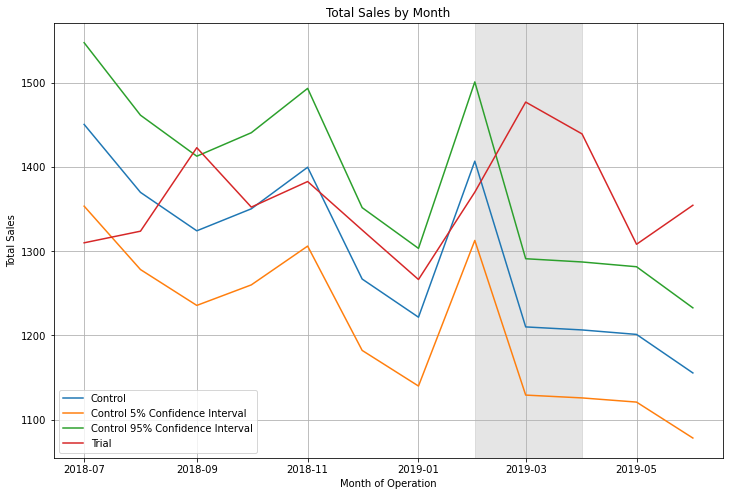

In [109]:
# plot the trial values against the control values and its 95th and 5th percentile

plt.figure(figsize = (12, 8))
plt.plot(sales_assessment)

plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial'])

# highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.grid()
plt.show()

The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let's have a look at assessing this for number of customers as well.

In [110]:
# scaling factor for customers

scalingFactor_Cust = scaling_factor(preTrial_measures, 88, 237, 'N_CUST')

scalingFactor_Cust

0.9943502824858758

In [111]:
# scale pre-trial control customers to match pre-trial trial store customers
# and get the percentage difference

cust_diff = percent_diff(measure_OverTime, 88, 237, 'N_CUST')

cust_diff

,YEAR_MONTH,scaled_agg,N_CUST,percent_diff
0,201807,128.199466,129,0.006244
1,201808,135.210375,131,0.031139
2,201809,126.196350,124,0.017404
3,201810,123.191675,123,0.001556
4,201811,132.205700,130,0.016684
5,201812,124.193233,126,0.014548
6,201901,117.182325,117,0.001556
7,201902,126.196350,124,0.017404
8,201903,119.185441,134,0.124298
9,201904,120.187000,128,0.065007


In [112]:
# get standard deviation

sigma = stdev(cust_diff.loc[cust_diff['YEAR_MONTH'] < 201902, 'percent_diff'])

sigma

0.010578886215113145

In [113]:
# complete trial assessment for customers

cust_assessment = trial_assessment(measure_OverTime, 88, 237, 'N_CUST')

cust_assessment

,scaled_agg,Control 5th percentile,Control 95th percentile,N_CUST
Transaction_Month,,,,
2018-07-01,128.199466,125.487051,130.911881,129
2018-08-01,135.210375,132.349624,138.071125,131
2018-09-01,126.196350,123.526316,128.866383,124
2018-10-01,123.191675,120.585213,125.798136,123
2018-11-01,132.205700,129.408522,135.002878,130
2018-12-01,124.193233,121.565581,126.820885,126
2019-01-01,117.182325,114.703008,119.661642,117
2019-02-01,126.196350,123.526316,128.866383,124
2019-03-01,119.185441,116.663743,121.707140,134


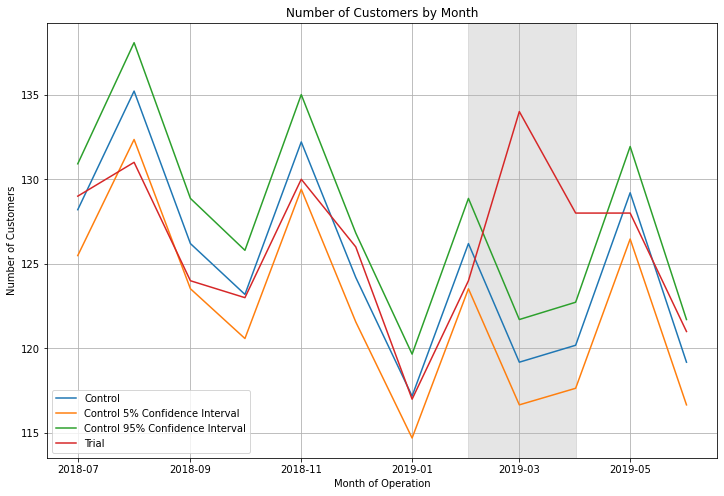

In [114]:
# plot the trial values against the control values and its 95th and 5th percentile

plt.figure(figsize = (12, 8))
plt.plot(cust_assessment)

plt.title('Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

plt.legend(['Control', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial'])

# highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.grid()
plt.show()

Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.

## Conclusion

Good work! We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.


The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales. <br> 
Now that we have finished our analysis, we can prepare our presentation to the Category Manager.